# Building machine-learning models to predict whether a patient will suffer a stroke based on associated risk factors.
## author: Dr. Reynier Cruz Torres

## Data source and details:

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

### Context

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. 
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

### Attribute Information

1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df = df.drop('id',axis=1)

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


### Check the labels

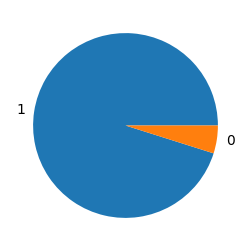

In [6]:
plt.figure(figsize=(3,3))
plt.pie(df['stroke'].value_counts(),labels=df['stroke'].unique())
plt.show()

##### we have imbalanced classes, which may turn into a problem. We'll have to deal with this later or the model performance will be deteriorated.

## Numerical data

In [7]:
numdf = df.select_dtypes(exclude=[object])

<AxesSubplot: >

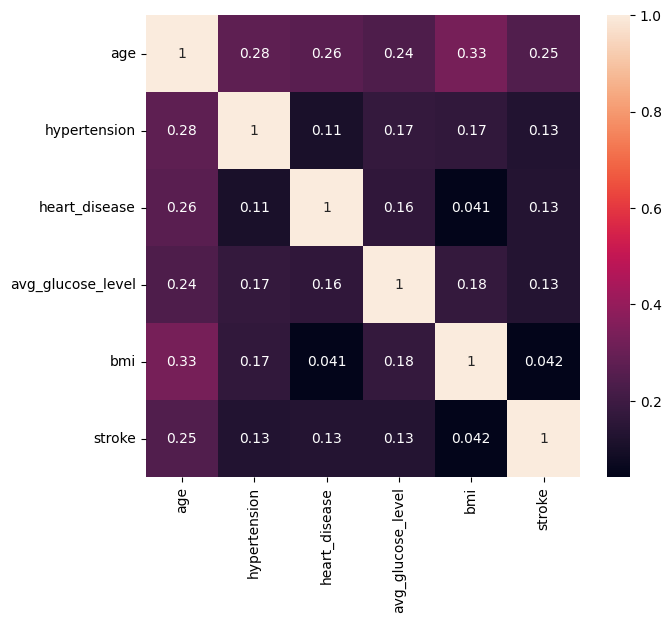

In [8]:
plt.figure(figsize=(7,6))
sns.heatmap(numdf.corr(),annot=True)

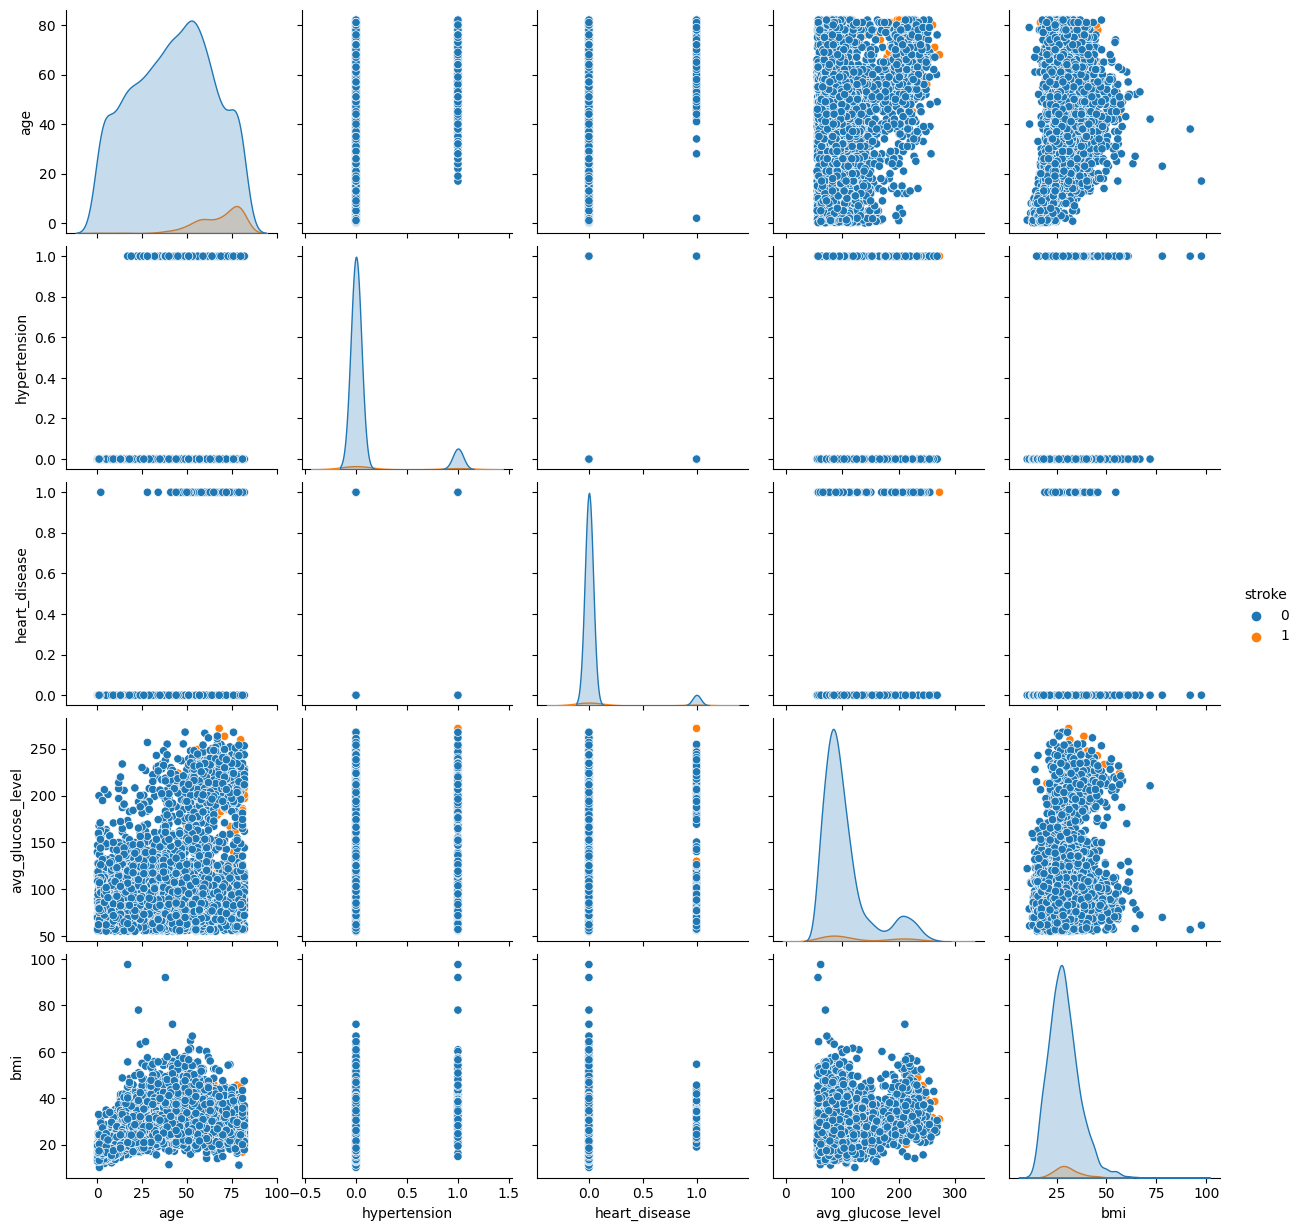

In [9]:
sns.pairplot(numdf,hue='stroke')

<AxesSubplot: >

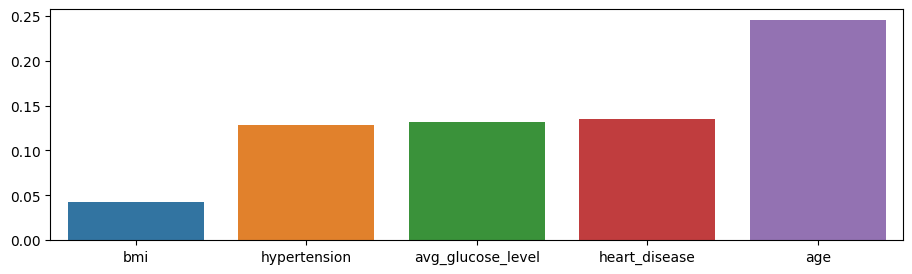

In [10]:
plt.figure(figsize=(11,3))
corr_series = numdf.corr()['stroke'][:-1].sort_values()
sns.barplot(x=corr_series.index,y=corr_series.values)

### BMI has missing data. Let's handle it

In [11]:
print('Percentage of missing BMI data:',np.round(100*numdf['bmi'].isna().sum()/len(numdf['bmi']),2),'%')

Percentage of missing BMI data: 3.93 %


<AxesSubplot: xlabel='bmi', ylabel='Count'>

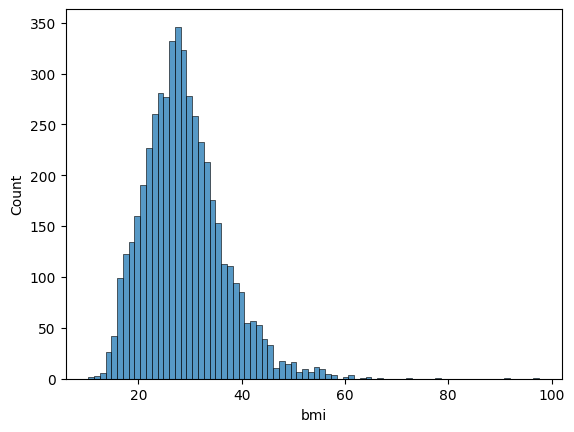

In [12]:
sns.histplot(numdf['bmi'])

In [13]:
df['bmi'] = numdf['bmi'].fillna(numdf['bmi'].mean())

## Categorical Data

In [14]:
catdf = df.select_dtypes(include=object)

In [15]:
for col in catdf.columns:
    print(col,'has',catdf[col].nunique(),'unique values:',catdf[col].unique())

gender has 3 unique values: ['Male' 'Female' 'Other']
ever_married has 2 unique values: ['Yes' 'No']
work_type has 5 unique values: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type has 2 unique values: ['Urban' 'Rural']
smoking_status has 4 unique values: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


<AxesSubplot: xlabel='ever_married', ylabel='age'>

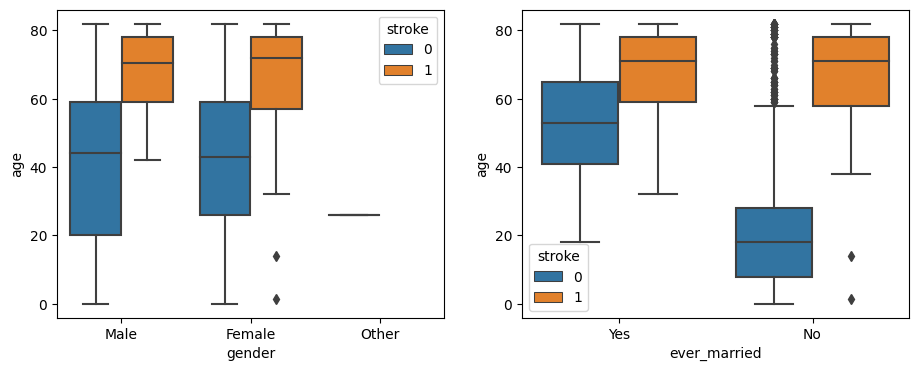

In [16]:
fig, ax = plt.subplots(ncols=2,figsize=(11,4))
sns.boxplot(data=df,x='gender',y='age',hue='stroke',ax=ax[0])
sns.boxplot(data=df,x='ever_married',y='age',hue='stroke',ax=ax[1])

<AxesSubplot: xlabel='smoking_status', ylabel='age'>

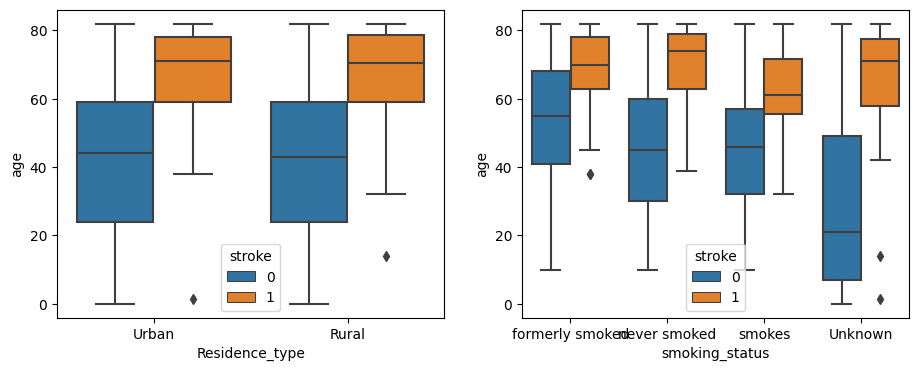

In [17]:
fig, ax = plt.subplots(ncols=2,figsize=(11,4))
sns.boxplot(data=df,x='Residence_type',y='age',hue='stroke',ax=ax[0])
sns.boxplot(data=df,x='smoking_status',y='age',hue='stroke',ax=ax[1])

<AxesSubplot: xlabel='work_type', ylabel='age'>

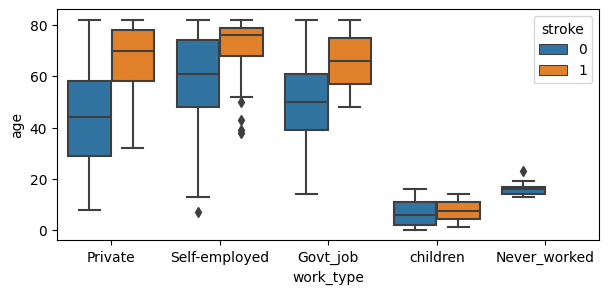

In [18]:
plt.figure(figsize=(7,3))
sns.boxplot(data=df,x='work_type',y='age',hue='stroke')

In [19]:
df['work_type'] = df['work_type'].map({'Private':1,'Self-employed':1,'Govt_job':1,'children':0,'Never_worked':0})

In [20]:
df = df.drop(['gender','Residence_type','smoking_status','ever_married'],axis=1)

## Rechecking what we did

<AxesSubplot: >

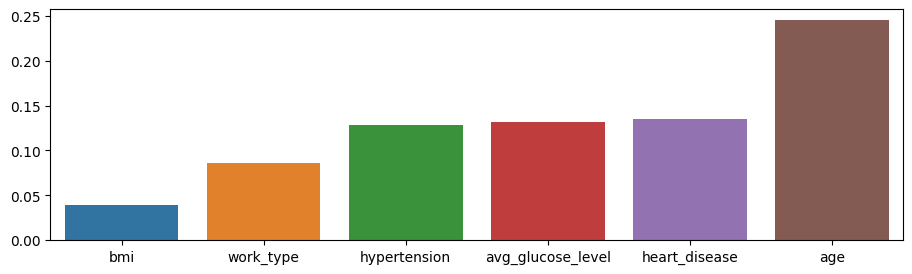

In [21]:
plt.figure(figsize=(11,3))
corr_series = df.corr()['stroke'][:-1].sort_values()
sns.barplot(x=corr_series.index,y=corr_series.values)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                5110 non-null   float64
 1   hypertension       5110 non-null   int64  
 2   heart_disease      5110 non-null   int64  
 3   work_type          5110 non-null   int64  
 4   avg_glucose_level  5110 non-null   float64
 5   bmi                5110 non-null   float64
 6   stroke             5110 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 279.6 KB


## Preparing data from ML

In [23]:
X = df.drop('stroke',axis=1)
y = df['stroke']

### Undersampling to balance classes

In [24]:
from imblearn.combine import SMOTETomek

smt= SMOTETomek()
X_resampled,y_resampled = smt.fit_resample(X, y)

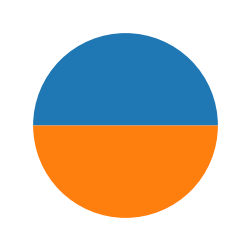

In [25]:
plt.figure(figsize=(3,3))
plt.pie(y_resampled.value_counts())
plt.show()

### Dividing into train and test samples

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.33, random_state=42)

### Scale the data

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Create and train models

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_curve, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
import time

def create_train_evaluate(model,X_train,y_train,X_test,y_test,param_grid,label='model'):
    
    t0 = time.time()
    
    # Train model
    gs = GridSearchCV(model,param_grid,cv=8)
    gs.fit(X_train,y_train)

    t = (time.time()-t0)/60.
    
    # Evaluate model
    preds = gs.predict(scaled_X_test)

    print(classification_report(y_test,preds))
    print('Best parameters',gs.best_params_)
        
    cm = confusion_matrix(y_test,preds,normalize='all')
    
    fig,ax = plt.subplots(ncols=2,figsize=(9,3))
    ConfusionMatrixDisplay(cm,display_labels=['no stroke','stroke']).plot(ax=ax[0])
    roc = RocCurveDisplay.from_estimator(gs,X_test,y_test,ax=ax[1],name=label)
    ax[1].plot([0,1],[0,1],color='black',ls='--')
    ax[1].set_xlim(0,1)
    ax[1].set_ylim(0,1)
    plt.tight_layout()
    
    print('Training took',np.round(t,2),'min')
        
    return gs, roc

### Random Forest

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      1580
           1       0.90      0.95      0.93      1560

    accuracy                           0.92      3140
   macro avg       0.93      0.93      0.92      3140
weighted avg       0.93      0.92      0.92      3140

Best parameters {'n_estimators': 80}
Training took 0.26 min


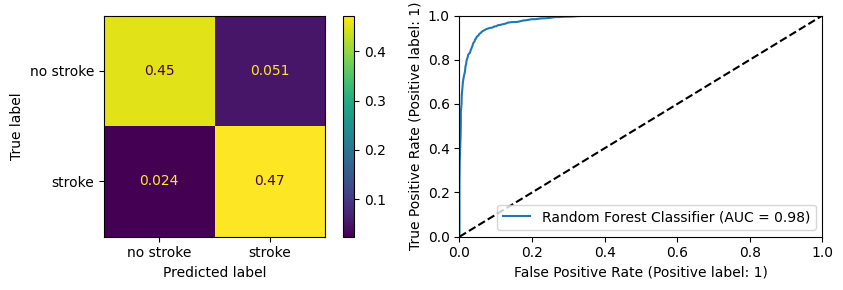

In [29]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators':[79,80,81]}
rf, rf_roc = create_train_evaluate(RandomForestClassifier(),scaled_X_train,y_train,
                                   scaled_X_test,y_test,param_grid,'Random Forest Classifier')

### Boosted Trees

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1580
           1       0.95      0.95      0.95      1560

    accuracy                           0.95      3140
   macro avg       0.95      0.95      0.95      3140
weighted avg       0.95      0.95      0.95      3140

Best parameters {'max_depth': 9, 'n_estimators': 140}
Training took 1.41 min


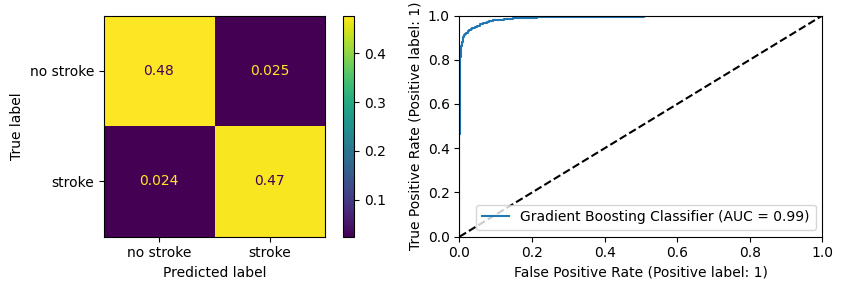

In [30]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
param_grid = {'n_estimators':[130,140],'max_depth':[8,9,10]}
bt, bt_roc = create_train_evaluate(GradientBoostingClassifier(),scaled_X_train,y_train,
                                   scaled_X_test,y_test,param_grid,'Gradient Boosting Classifier')

### Logistic regression

              precision    recall  f1-score   support

           0       0.82      0.74      0.77      1580
           1       0.76      0.83      0.79      1560

    accuracy                           0.78      3140
   macro avg       0.79      0.78      0.78      3140
weighted avg       0.79      0.78      0.78      3140

Best parameters {'C': 0.005, 'max_iter': 60}
Training took 0.01 min


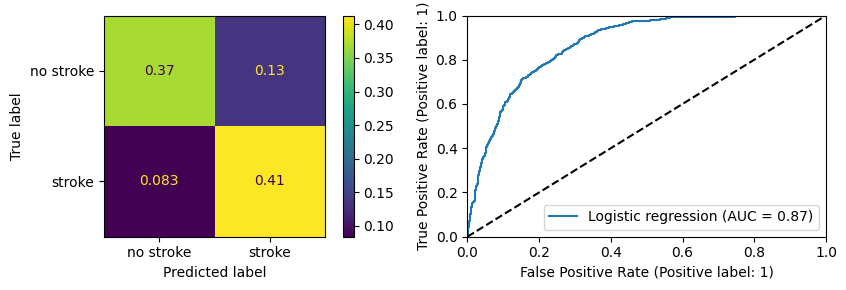

In [31]:
from sklearn.linear_model import LogisticRegression
param_grid = {'C':[0.005,0.001,0.01],'max_iter':[60,80,90,100]}
lr, lr_roc = create_train_evaluate(LogisticRegression(),scaled_X_train,y_train,
                                   scaled_X_test,y_test,param_grid,'Logistic regression')

### SGD Classifier

              precision    recall  f1-score   support

           0       0.83      0.69      0.75      1580
           1       0.73      0.85      0.79      1560

    accuracy                           0.77      3140
   macro avg       0.78      0.77      0.77      3140
weighted avg       0.78      0.77      0.77      3140

Best parameters {'epsilon': 0.6}
Training took 0.01 min


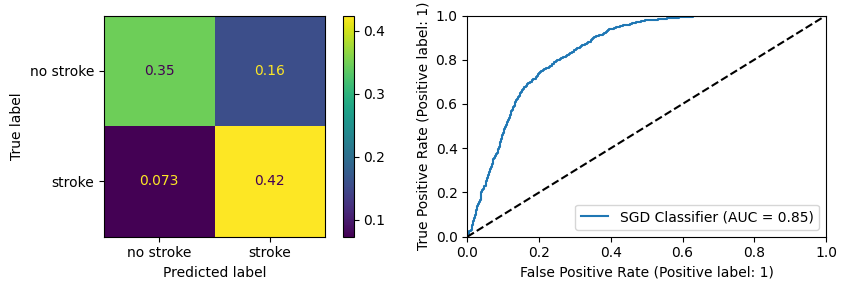

In [32]:
from sklearn.linear_model import SGDClassifier
param_grid = {'epsilon':[0.1,0.05,0.2,0.6,0.8]}
sgd, sgd_roc = create_train_evaluate(SGDClassifier(),scaled_X_train,y_train,
                                     scaled_X_test,y_test,param_grid,'SGD Classifier')

### Feed-Forward NN

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(X.shape[1],'relu'))
model.add(Dropout(0.5))
model.add(Dense(8,'relu'))
model.add(Dropout(0.5))
model.add(Dense(4,'relu'))
model.add(Dropout(0.5))
model.add(Dense(1,'sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(patience=7)

model.fit(x=scaled_X_train,y=y_train,validation_data=(scaled_X_test,y_test),epochs=100,
          verbose=0,callbacks=[early_stop])

2023-01-11 19:23:40.963887: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Text(0, 0.5, 'loss')

<Figure size 640x480 with 0 Axes>

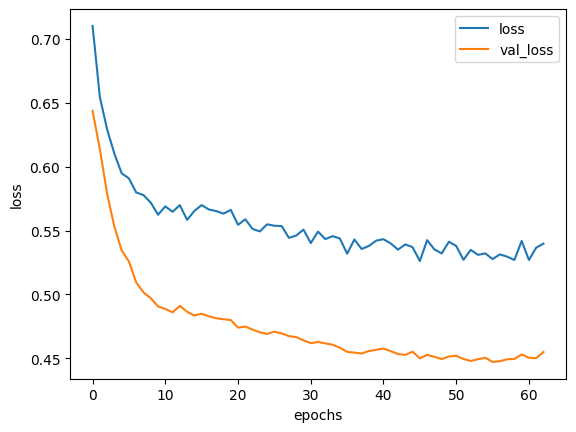

In [34]:
plt.figure()
history = pd.DataFrame(model.history.history)
history.plot()
plt.xlabel('epochs')
plt.ylabel('loss')

99/99 [==============================] - 0s 268us/step


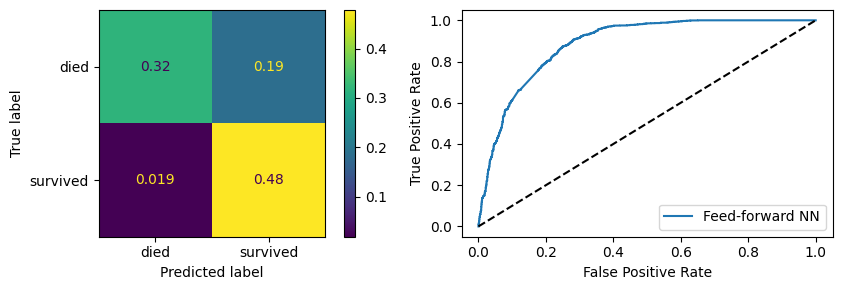

In [35]:
preds_proba = model.predict(scaled_X_test)
preds = (preds_proba>0.5).astype(int)

#preds =model.predict(scaled_X_test).ravel()
cm = confusion_matrix(y_test,preds,normalize='all')
fpr, tpr, thresh = roc_curve(y_test,preds_proba)

fig,ax = plt.subplots(ncols=2,figsize=(9,3))
ConfusionMatrixDisplay(cm,display_labels=['died','survived']).plot(ax=ax[0])
nn_roc = RocCurveDisplay(fpr=fpr,tpr=tpr,estimator_name='Feed-forward NN')
nn_roc.plot(ax=ax[1])
ax[1].plot([0,1],[0,1],color='black',ls='--')
plt.tight_layout()

(0.0, 1.0)

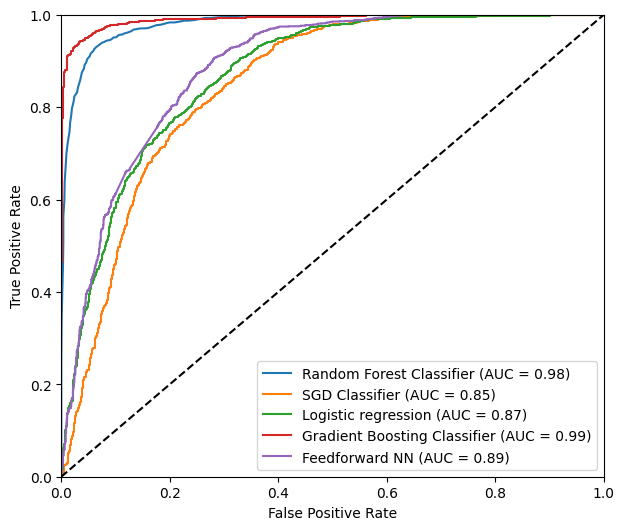

In [36]:
from sklearn.metrics import auc

fig,ax = plt.subplots(figsize=(7,6))

nn_roc.estimator_name = 'Feedforward NN (AUC = {})'.format(np.round(auc(fpr,tpr),2))

rf_roc.plot(ax=ax)
sgd_roc.plot(ax=ax)
lr_roc.plot(ax=ax)
bt_roc.plot(ax=ax)
nn_roc.plot(ax=ax)
ax.plot([0,1],[0,1],color='black',ls='--')

ax.set_xlim(0,1)
ax.set_ylim(0,1)